In [ ]:
pip install pandas numpy matplotlib seaborn yfinance backtrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
!ls /content/drive/MyDrive/Banknifty.rar

/content/drive/MyDrive/Banknifty.rar


In [ ]:
# Install unrar if not installed
!apt-get install unrar
# Extract the   Banknifty.rar file
!unrar x /content/drive/MyDrive/Banknifty.rar /content/extracted_files/


Streaming output truncated to the last 5000 lines.
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2343700PE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2343800CE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2343800PE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2343900CE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2343900PE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2344000CE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2344000PE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2344100CE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN2344100PE.csv      33%  OK 
Extracting  /content/extracted_files/BAnknifty/BANKNIFTY25JAN234420

In [ ]:
# List the extracted files
!ls /content/extracted_files/

BAnknifty


In [ ]:
import pandas as pd
import os
extracted_folder = '/content/extracted_files/BAnknifty'
# Loop through each file in the extracted folder
for file_name in os.listdir(extracted_folder):
    if file_name.endswith('.csv'):  # You can change this to handle other file types
        file_path = os.path.join(extracted_folder, file_name)
        print(f"Reading file: {file_name}")

Streaming output truncated to the last 5000 lines.
Reading file: BANKNIFTY18OCT2346500PE.csv
Reading file: BANKNIFTY09MAR2338400CE.csv
Reading file: BANKNIFTY21JUN32300CE.csv
Reading file: BANKNIFTY22SEP46000PE.csv
Reading file: BANKNIFTY15NOV2345600PE.csv
Reading file: BANKNIFTY25MAY2343200CE.csv
Reading file: BANKNIFTY18OCT2347500PE.csv
Reading file: BANKNIFTY11MAY2343300CE.csv
Reading file: BANKNIFTY15JAN18800CE.csv
Reading file: BANKNIFTY15JUN2346400CE.csv
Reading file: BANKNIFTY25JAN2447400PE.csv
Reading file: BANKNIFTY07FEB2443800CE.csv
Reading file: BANKNIFTY29JUN2340000CE.csv
Reading file: BANKNIFTY16MAR2339000CE.csv
Reading file: BANKNIFTY22NOV2344600CE.csv
Reading file: BANKNIFTY27APR2344700CE.csv
Reading file: BANKNIFTY29MAR2338400PE.csv
Reading file: BANKNIFTY24APR2448100CE.csv
Reading file: BANKNIFTY12JAN2343300CE.csv
Reading file: BANKNIFTY21DEC31800PE.csv
Reading file: BANKNIFTY13DEC2347700CE.csv
Reading file: BANKNIFTY29FEB2448200CE.csv
Reading file: BANKNIFTY21DEC34800

In [ ]:
 # Read and print the first few rows of each CSV file
 df = pd.read_csv(file_path)
 print(df.head(), "\n")  # Print first few rows of the dataframe

                  ticker             datetime        date      time    open  \
0  BANKNIFTY22JUL29700PE  2022-06-16 13:30:00  2022-06-16  13:30:00  256.55   
1  BANKNIFTY22JUL29700PE  2022-06-16 15:07:00  2022-06-16  15:07:00  260.00   
2  BANKNIFTY22JUL29700PE  2022-06-17 10:10:00  2022-06-17  10:10:00  261.35   
3  BANKNIFTY22JUL29700PE  2022-06-17 10:13:00  2022-06-17  10:13:00  261.35   
4  BANKNIFTY22JUL29700PE  2022-06-17 10:53:00  2022-06-17  10:53:00  258.10   

     high     low   close  volume  open_interest  ...  instrument_name  \
0  260.00  256.55  260.00     501            250  ...        BANKNIFTY   
1  260.00  260.00  260.00     250            500  ...        BANKNIFTY   
2  261.35  261.35  261.35      26            750  ...        BANKNIFTY   
3  261.35  261.35  261.35      50            750  ...        BANKNIFTY   
4  258.10  258.10  258.10     275            800  ...        BANKNIFTY   

  expiry_type Time_to_expiry spot_price        iv     delta     gamma  \
0      

In [ ]:
df.shape

(847, 23)

**4. Selecting Strategies Based on Scenarios**

In [ ]:
def straddle_profit(spot_price, strike_price, call_price, put_price):
    return max(spot_price - strike_price, 0) - call_price + max(strike_price - spot_price, 0) - put_price

In [ ]:
df.columns

Index(['ticker', 'datetime', 'date', 'time', 'open', 'high', 'low', 'close',
       'volume', 'open_interest', 'strike_price', 'instrument_type',
       'expiry_date', 'instrument_name', 'expiry_type', 'Time_to_expiry',
       'spot_price', 'iv', 'delta', 'gamma', 'vega', 'theta', 'rho'],
      dtype='object')

In [ ]:
print(df.head(10))

                  ticker             datetime        date      time    open  \
0  BANKNIFTY22JUL29700PE  2022-06-16 13:30:00  2022-06-16  13:30:00  256.55   
1  BANKNIFTY22JUL29700PE  2022-06-16 15:07:00  2022-06-16  15:07:00  260.00   
2  BANKNIFTY22JUL29700PE  2022-06-17 10:10:00  2022-06-17  10:10:00  261.35   
3  BANKNIFTY22JUL29700PE  2022-06-17 10:13:00  2022-06-17  10:13:00  261.35   
4  BANKNIFTY22JUL29700PE  2022-06-17 10:53:00  2022-06-17  10:53:00  258.10   
5  BANKNIFTY22JUL29700PE  2022-06-17 11:04:00  2022-06-17  11:04:00  258.10   
6  BANKNIFTY22JUL29700PE  2022-06-17 11:13:00  2022-06-17  11:13:00  263.45   
7  BANKNIFTY22JUL29700PE  2022-06-17 11:26:00  2022-06-17  11:26:00  256.95   
8  BANKNIFTY22JUL29700PE  2022-06-17 11:42:00  2022-06-17  11:42:00  274.35   
9  BANKNIFTY22JUL29700PE  2022-06-17 11:54:00  2022-06-17  11:54:00  282.30   

     high     low   close  volume  open_interest  ...  instrument_name  \
0  260.00  256.55  260.00     501            250  ...   

**Complete Task 1: Strategy Development and Backtesting Across Market Scenarios**

Section 1: Data Generation

In [ ]:
import pandas as pd

def generate_sample_data():
    # Example historical closing prices for testing
    return pd.DataFrame({
        'close': [100, 105, 110, 95, 90, 115, 120, 125, 130, 115, 110, 100, 90, 80]
    })


Section 2: Long Straddle Strategy (High Volatility Market)

This section defines the function for backtesting the long straddle strategy.

In [ ]:
# Long Straddle Strategy Backtest
def backtest_long_straddle(df):
    total_profit = 0
    premiums_paid = 0  # Assume 10% of the spot price for both call and put
    for i in range(len(df) - 1):
        spot_price_today = df.iloc[i]['close']
        strike_price = spot_price_today  # At-the-money

        # Premiums for call and put options
        call_price = spot_price_today * 0.1
        put_price = spot_price_today * 0.1
        premiums_paid += (call_price + put_price)

        # Next day's closing price
        spot_price_tomorrow = df.iloc[i + 1]['close']

        # Calculate profit from the straddle
        profit = max(0, spot_price_tomorrow - strike_price) + max(0, strike_price - spot_price_tomorrow) - (call_price + put_price)
        total_profit += profit

    return total_profit - premiums_paid  # Subtract total premiums paid


Section 3: Covered Call Strategy (Bullish Market with Low Volatility)

This section defines the function for backtesting the covered call strategy.

In [ ]:
# Covered Call Strategy Backtest
def backtest_covered_call(df):
    total_profit = 0
    premiums_collected = 0  # Assume 10% of the strike price
    for i in range(len(df) - 1):
        spot_price_today = df.iloc[i]['close']
        strike_price = spot_price_today * 1.05  # Slightly above current price
        call_price = strike_price * 0.1  # Premium collected from selling the call

        premiums_collected += call_price

        # Next day's closing price
        spot_price_tomorrow = df.iloc[i + 1]['close']

        if spot_price_tomorrow <= strike_price:
            # Call expires worthless
            profit = spot_price_tomorrow - spot_price_today + call_price
        else:
            # Call is exercised
            profit = strike_price - spot_price_today + call_price

        total_profit += profit

    return total_profit + premiums_collected  # Add total premiums collected


Section 4: Protective Put Strategy (Bearish Market with High Implied Volatility)

This section defines the function for backtesting the protective put strategy.

In [ ]:
# Protective Put Strategy Backtest
def backtest_protective_put(df):
    total_profit = 0
    for i in range(len(df) - 1):
        spot_price_today = df.iloc[i]['close']
        strike_price = spot_price_today * 0.95  # Slightly below current price
        put_price = strike_price * 0.1  # Assume premium paid for the put

        # Next day's closing price
        spot_price_tomorrow = df.iloc[i + 1]['close']

        if spot_price_tomorrow < spot_price_today:
            # Calculate profit from the protective put
            profit = min(spot_price_today, strike_price) - put_price
        else:
            profit = spot_price_tomorrow - put_price

        total_profit += profit

    return total_profit


Section 5: Main Execution Function

This section ties everything together and executes the backtests.

In [ ]:
# Main function to execute the backtests
def main():
    df = generate_sample_data()

    print("Backtesting Long Straddle Strategy (High Volatility Market)...")
    long_straddle_profit = backtest_long_straddle(df)
    print(f'Total Profit from Long Straddle: {long_straddle_profit}')

    print("\nBacktesting Covered Call Strategy (Bullish Market with Low Volatility)...")
    covered_call_profit = backtest_covered_call(df)
    print(f'Total Profit from Covered Call: {covered_call_profit}')

    print("\nBacktesting Protective Put Strategy (Bearish Market with High Implied Volatility)...")
    protective_put_profit = backtest_protective_put(df)
    print(f'Total Profit from Protective Put: {protective_put_profit}')

# Execute the main function
if __name__ == "__main__":
    main()



Backtesting Long Straddle Strategy (High Volatility Market)...
Total Profit from Long Straddle: -442.0

Backtesting Covered Call Strategy (Bullish Market with Low Volatility)...
Total Profit from Covered Call: 254.55

Backtesting Protective Put Strategy (Bearish Market with High Implied Volatility)...
Total Profit from Protective Put: 1284.0249999999999


**Task 2:**

 **Difference Analysis Between Call Calendars**
Scenario 1:
Short call with 60 days to expiry and long call with 70 days to expiry.

Scenario 2:
Short call with 0 days to expiry and long call with 1 day to expiry

Task:

Analyze the risk-reward profile, time decay effects, and volatility impacts for both scenarios.

Discuss how the differing time horizons affect strategy performance and potential adjustments needed.


In [ ]:
df.columns

Index(['ticker', 'datetime', 'date', 'time', 'open', 'high', 'low', 'close',
       'volume', 'open_interest', 'strike_price', 'instrument_type',
       'expiry_date', 'instrument_name', 'expiry_type', 'Time_to_expiry',
       'spot_price', 'iv', 'delta', 'gamma', 'vega', 'theta', 'rho'],
      dtype='object')

In [ ]:
# Example: Extracting the last available data for analysis
latest_data = df.iloc[-1]  # Get the last row
current_price = latest_data['close']  # Current Bank Nifty closing price
strike_price = latest_data['strike_price']  # Strike price of the calls
short_call_premium = latest_data['open_interest']  # Replace with actual short call premium if available
long_call_premium = latest_data['iv']  # Replace with actual long call premium if available

# For the demonstration, let's just use some of the other values directly from the latest row.
time_to_expiry_short = latest_data['Time_to_expiry']  # For the short call
time_to_expiry_long = time_to_expiry_short + 10  # Assume the long call has more days to expiry
          # Replace with actual column name


In [ ]:
# Calculate Profit/Loss for Short and Long Calls
import numpy as np
def short_call_profit_loss(price, strike_price, premium):
    return premium if price <= strike_price else premium - (price - strike_price)

def long_call_profit_loss(price, strike_price, premium):
    return max(0, price - strike_price) - premium

# Generate a range of underlying prices for analysis
underlying_prices = np.linspace(current_price - 1000, current_price + 1000, 100)


In [ ]:
# Calculate P&L for both strategies
short_call_pnl = [short_call_profit_loss(price, strike_price, short_call_premium) for price in underlying_prices]
long_call_pnl = [long_call_profit_loss(price, strike_price, long_call_premium) for price in underlying_prices]


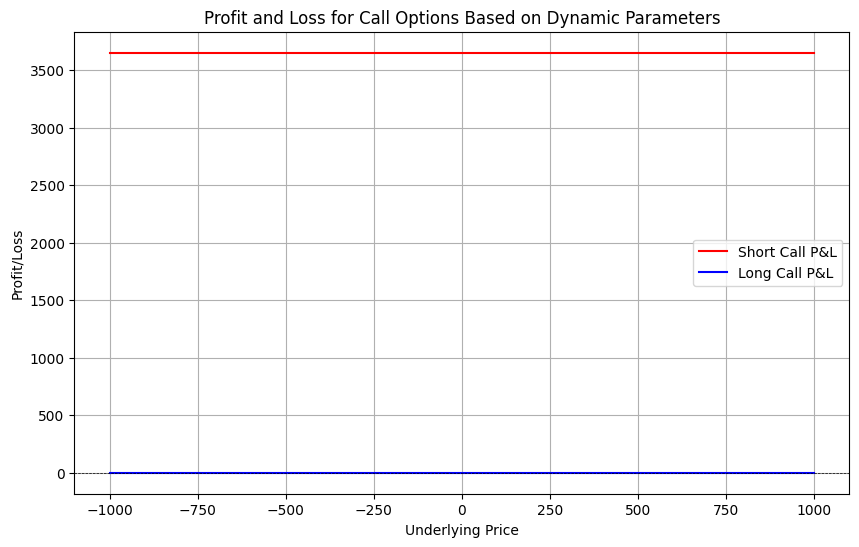

In [ ]:
import matplotlib.pyplot as plt
# Plotting the P&L for both strategies
plt.figure(figsize=(10, 6))
plt.plot(underlying_prices, short_call_pnl, label='Short Call P&L', color='red')
plt.plot(underlying_prices, long_call_pnl, label='Long Call P&L', color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title('Profit and Loss for Call Options Based on Dynamic Parameters')
plt.xlabel('Underlying Price')
plt.ylabel('Profit/Loss')
plt.legend()
plt.grid()
plt.show()


Loop Through Multiple Rows


Scenario 1: Call Calendar with slightly different expiry dates


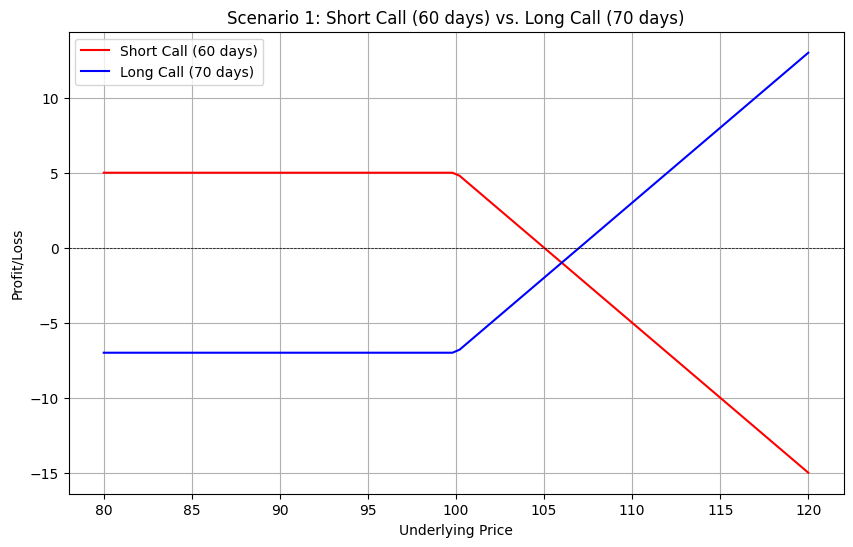

Scenario 2: Call Calendar with very close expiry dates


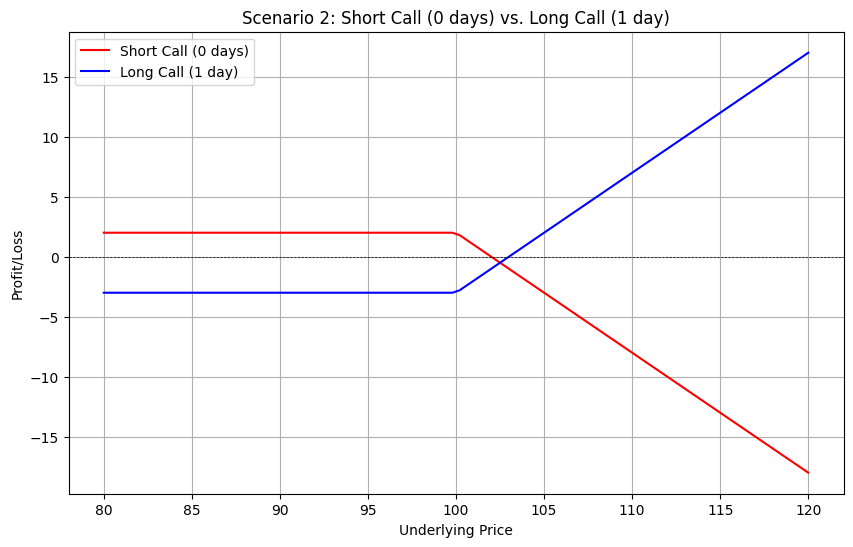

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Task 2: Difference Analysis Between Call Calendars
# Scenario 1: Short call with 60 days to expiry and long call with 70 days to expiry.
def scenario_1(df):
    current_price = 100
    strike_price = 100
    short_call_premium = 5
    long_call_premium = 7
    time_to_expiry_short = 60
    time_to_expiry_long = 70

    underlying_prices = np.linspace(current_price - 20, current_price + 20, 100)

    short_call_pnl = [short_call_profit_loss(price, strike_price, short_call_premium) for price in underlying_prices]
    long_call_pnl = [long_call_profit_loss(price, strike_price, long_call_premium) for price in underlying_prices]

    # Plot Scenario 1
    plt.figure(figsize=(10, 6))
    plt.plot(underlying_prices, short_call_pnl, label='Short Call (60 days)', color='red')
    plt.plot(underlying_prices, long_call_pnl, label='Long Call (70 days)', color='blue')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.title('Scenario 1: Short Call (60 days) vs. Long Call (70 days)')
    plt.xlabel('Underlying Price')
    plt.ylabel('Profit/Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Scenario 2: Short call with 0 days to expiry and long call with 1 day to expiry
def scenario_2(df):
    # Example for demonstration purposes, adjust these parameters to real-world values.
    current_price = 100
    strike_price = 100
    short_call_premium = 2
    long_call_premium = 3
    time_to_expiry_short = 0
    time_to_expiry_long = 1

    underlying_prices = np.linspace(current_price - 20, current_price + 20, 100)

    short_call_pnl = [short_call_profit_loss(price, strike_price, short_call_premium) for price in underlying_prices]
    long_call_pnl = [long_call_profit_loss(price, strike_price, long_call_premium) for price in underlying_prices]

    # Plot Scenario 2
    plt.figure(figsize=(10, 6))
    plt.plot(underlying_prices, short_call_pnl, label='Short Call (0 days)', color='red')
    plt.plot(underlying_prices, long_call_pnl, label='Long Call (1 day)', color='blue')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.title('Scenario 2: Short Call (0 days) vs. Long Call (1 day)')
    plt.xlabel('Underlying Price')
    plt.ylabel('Profit/Loss')
    plt.legend()
    plt.grid()
    plt.show()


# Execute Scenarios
if __name__ == "__main__":
    df = generate_sample_data()  # Replace with your actual data loading

    print("Scenario 1: Call Calendar with slightly different expiry dates")
    scenario_1(df)

    print("Scenario 2: Call Calendar with very close expiry dates")
    scenario_2(df)
